<a href="https://colab.research.google.com/github/didacuscha/Maths_for_AI/blob/main/laboratorio4_formasCuadraticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

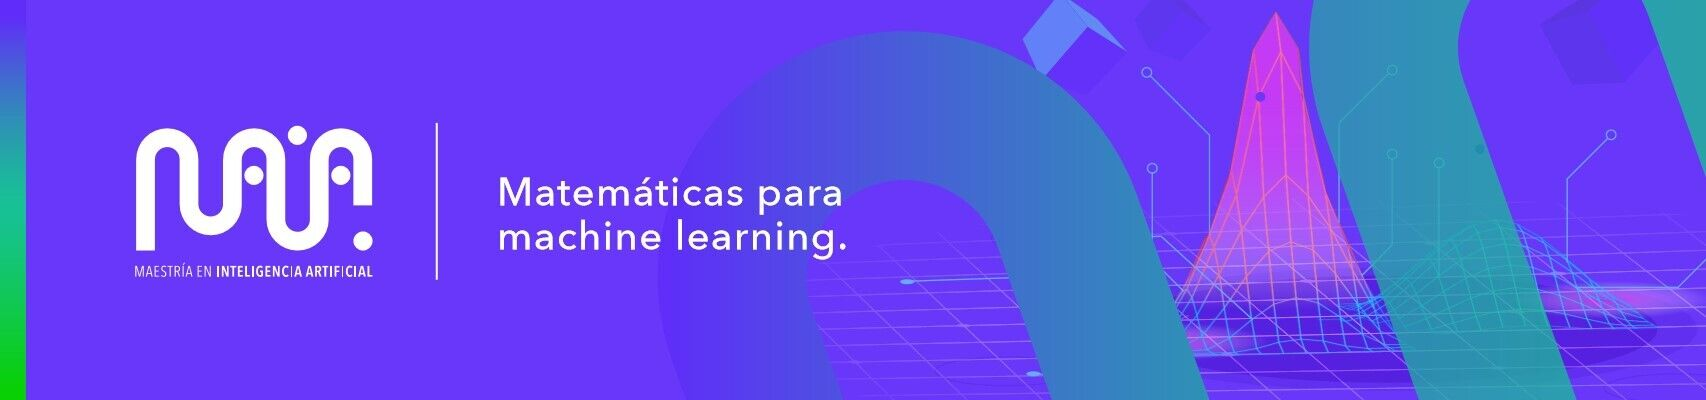

#**Laboratorio: inspección visual de las formas cuadráticas**

Las formas cuadráticas son funciones muy usadas en machine learning que permiten caracterizar ciertas propiedades de matrices. En este laboratorio, introduciremos las herramientas para inspeccionar visualmente formas cuadráticas a través de superficies y sus curvas de nivel.

#**Formas cuadráticas**

Antes de entender cómo graficar las formas cuadráticas, vamos a recordar brevemente su definición. Una forma cuadrática se define como:

$$f(x) = x^TQx$$,

donde $Q$ es una matriz cuadrada de tamaño $n\times n$, y $x$ es un vector de $n$ elementos. Note que $f:\mathbb{R}^n\rightarrow \mathbb{R}$. La inspección gráfica se hace usualmente para $n=2$.

#**Gráficas de curvas de nivel**

Un gráfico de curvas de nivel es un gráfico que contiene curvas en un plano bi-dimensional, y cada curva corresponder a aquellos vectores que tienen exactamente el mismo valor de la función. En Python podemos graficar dos tipos de curvas de nivel: con relleno y sin relleno. Los graficos de curvas de nivel se ven de la siguiente manera:

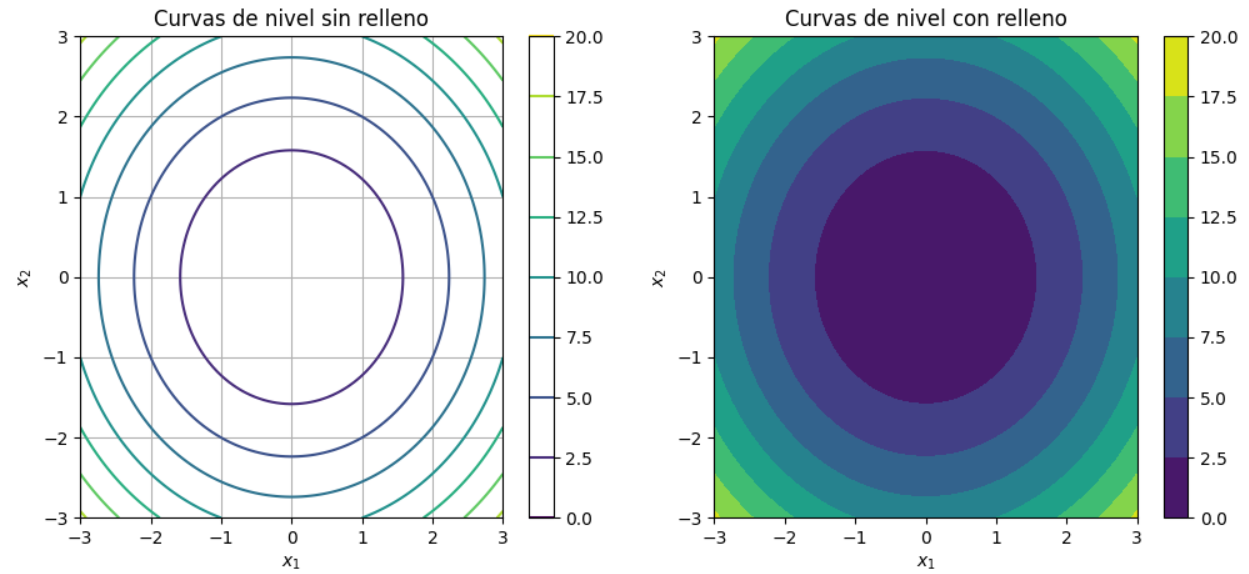

El procedimiento para generar las curvas de nivel con y sin relleno es muy similar y se describe a continuación. Primero, se importan las librerias numpy y matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Posteriormente, se definen los valores de $x_1$ y $x_2$ para los que se van a graficar las curvas de nivel.

In [2]:
x1 = np.linspace(-3,3,100)
x2 = np.linspace(-3,3,100)

En este caso se van a tomar 100 valores para ambas variables entre -3 y 3. A continuación, se utiliza la función *meshgrid* de numpy para generar dos arrays bidimensionales (uno para cada variable) que se utilizarán como parejas de coordenadas para calcular la función en cada punto.


In [3]:
X1,X2 = np.meshgrid(x1,x2)

Note que por convención y para evitar confusiones, los nombres de los arrays bidimensionales tienen letras mayúsculas en lugar de minúsculas.

Asumiendo que la función es $f(x_1,x_2) = x_1^2 + x_2^2$, la función se puede definir de la siguiente manera:

In [4]:
def funcion(x1,x2):
  return x1**2 + x2**2

f = funcion(X1,X2)


Por último, se genera la gráfica para los valores calculados. Si se desea un gráfico de curvas de nivel sin relleno se debe usar la función *contour*, en caso de que se deseen curvas de nivel con relleno se utiliza la función *contourf*. En este caso se realizará el ejemplo con curvas de nivel con relleno. El resultado se muestra a continuación:

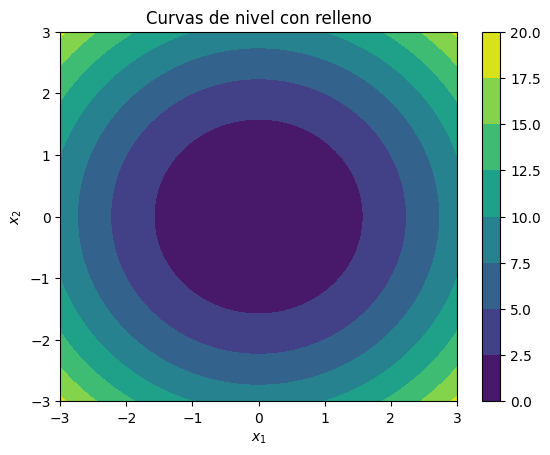

In [5]:
plt.figure()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
V = plt.contourf(X1,X2,f)
plt.title("Curvas de nivel con relleno")
plt.colorbar(V)

plt.show()

#**Gráfico de superficie**

Un gráfico de superficie es un gráfico tridimensional que representa el valor de la función en un punto dado como un valor en el eje Z. Un gráfico de superficie se ve de la siguiente manera:

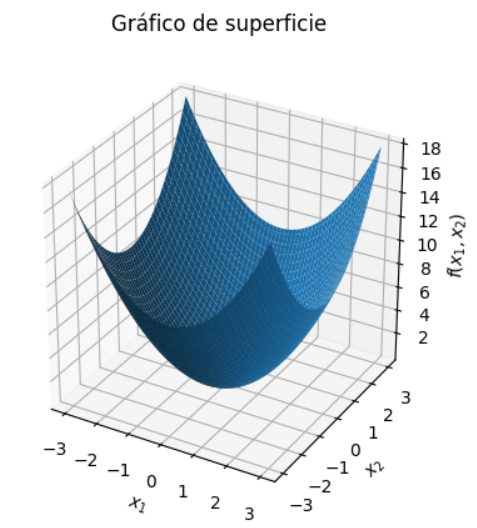

El proceso para generar el gráfico de superficie es muy similar al proceso para generar las curvas de nivel. Su única diferencia se encuentra en el último paso (generar la figura) ya que el plot se define de la siguiente manera:

En este caso se hará uso de la función *subplots* de matplotlib junto con el argumento *subplot_kw* que indicará que la figura en este caso es tridimensional mediante el uso de la llave "projection" como se muestra a continuación:

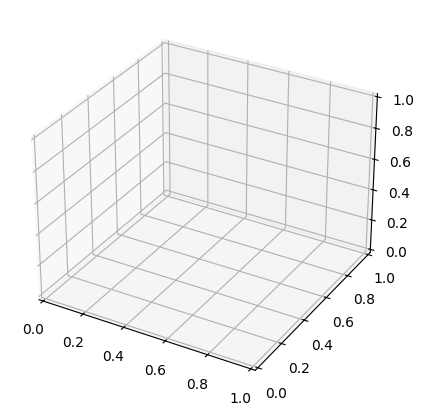

In [6]:
fig,ax = plt.subplots(subplot_kw={"projection":"3d"},figsize=(10,5))

Adicionalmente, se hará uso de la función *plot_surface* de igual manera como se utilizaban las funciones *contour* y *contourf* para las curvas de nivel.

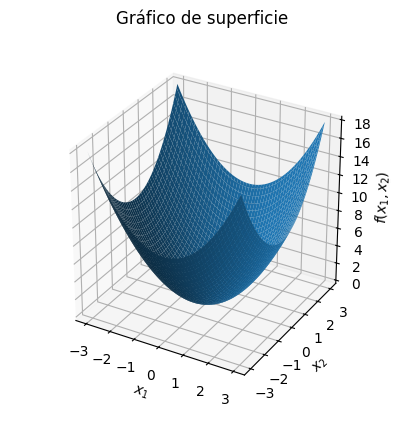

In [7]:
fig,ax = plt.subplots(subplot_kw={"projection":"3d"},figsize=(10,5))
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x_1,x_2)$")
ax.plot_surface(X1,X2,f)
ax.set_title("Gráfico de superficie")
ax.set_box_aspect([6,6,6],zoom=0.85)
plt.show()

#**Ejemplos**

**1.** Grafique curvas de nivel y superficies para las siguientes matrices (modifique la función de la forma cuadrática por la ecuación de cada matriz):

$$Q_1 = \begin{bmatrix}
 2 & 2\\
 4 & 7
\end{bmatrix}
Q_2 = \begin{bmatrix}
 2 & 3\\
 3 & 7
\end{bmatrix}
Q_3 = \begin{bmatrix}
 2 & 0\\
 0 & -3
\end{bmatrix}
Q_4 = \begin{bmatrix}
 -2 & 0\\
 0 & -3
\end{bmatrix}$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



x1 = np.linspace(-4,4,100)
x2 = np.linspace(-4,4,100)
X1,X2 = np.meshgrid(x1,x2)

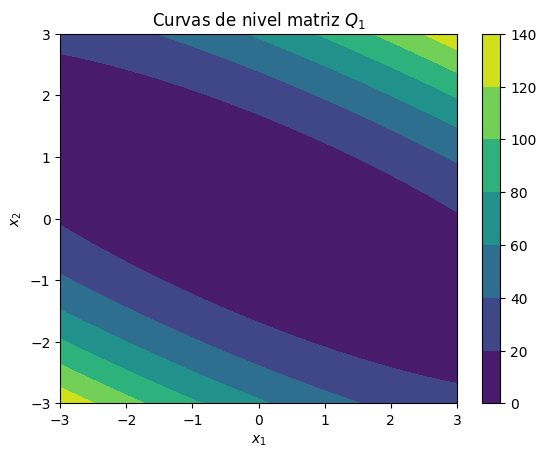

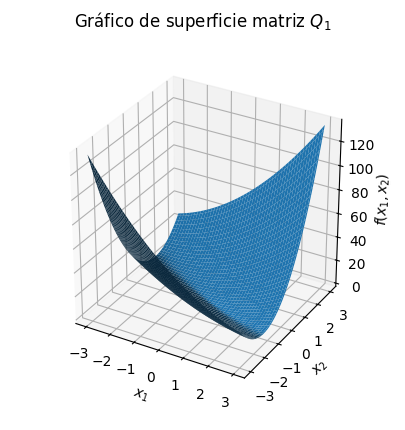

In [9]:
#Forma cuadrática Q1

# Matriz Q1
Q = np.array([[2, 2],
              [4, 7]])

def forma_cuadratica_q(x1, x2):
    X = np.stack([x1, x2], axis=-1)  # Shape (..., 2)
    return np.einsum('...i,ij,...j->...', X, Q, X)

f = forma_cuadratica_q(X1,X2)


#Curvas de nivel
plt.figure()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
V = plt.contourf(X1,X2,f)
plt.title("Curvas de nivel matriz $Q_1$")
plt.colorbar(V)

plt.show()

#Grafico de superficie
fig,ax = plt.subplots(subplot_kw={"projection":"3d"},figsize=(10,5))
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x_1,x_2)$")
ax.plot_surface(X1,X2,f)
ax.set_title("Gráfico de superficie matriz $Q_1$")
ax.set_box_aspect([6,6,6],zoom=0.85)
plt.show()

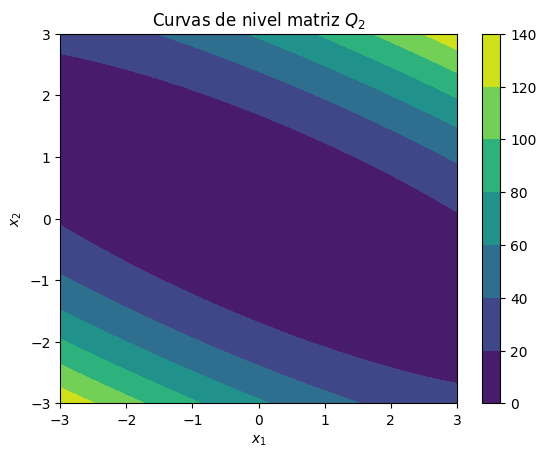

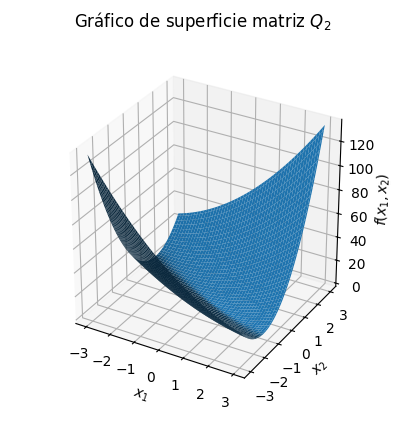

In [10]:
#Forma cuadrática Q2

# Matriz Q2
Q = np.array([[2, 3],
              [3, 7]])

f = forma_cuadratica_q(X1,X2)

#Curvas de nivel
plt.figure()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
V = plt.contourf(X1,X2,f)
plt.title("Curvas de nivel matriz $Q_2$")
plt.colorbar(V)

plt.show()

#Grafico de superficie
fig,ax = plt.subplots(subplot_kw={"projection":"3d"},figsize=(10,5))
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x_1,x_2)$")
ax.plot_surface(X1,X2,f)
ax.set_title("Gráfico de superficie matriz $Q_2$")
ax.set_box_aspect([6,6,6],zoom=0.85)
plt.show()

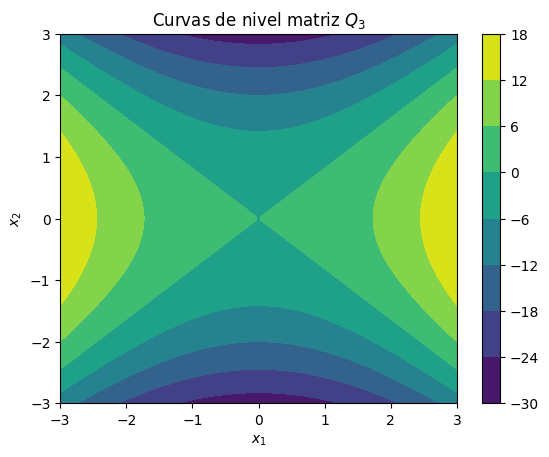

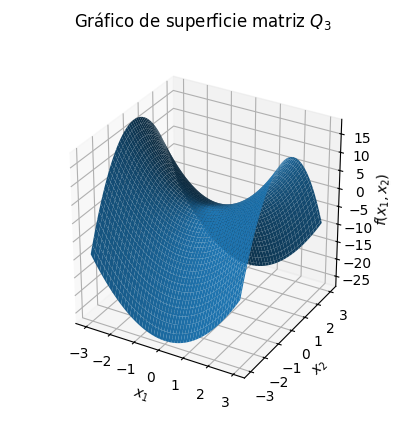

In [11]:
#Forma cuadrática Q3

# Matriz Q3
Q = np.array([[2, 0],
              [0, -3]])

f = forma_cuadratica_q(X1,X2)


#Curvas de nivel
plt.figure()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
V = plt.contourf(X1,X2,f)
plt.title("Curvas de nivel matriz $Q_3$")
plt.colorbar(V)

plt.show()

#Grafico de superficie
fig,ax = plt.subplots(subplot_kw={"projection":"3d"},figsize=(10,5))
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x_1,x_2)$")
ax.plot_surface(X1,X2,f)
ax.set_title("Gráfico de superficie matriz $Q_3$")
ax.set_box_aspect([6,6,6],zoom=0.85)
plt.show()

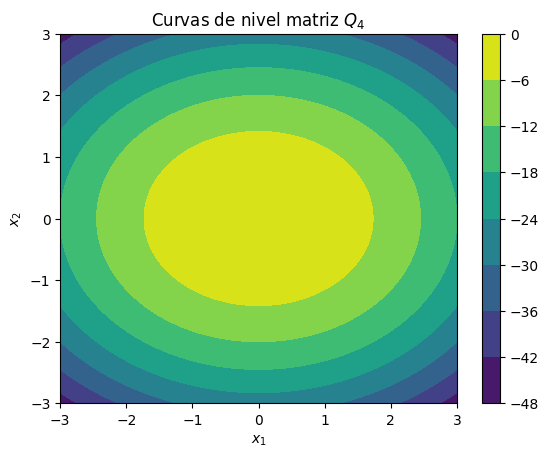

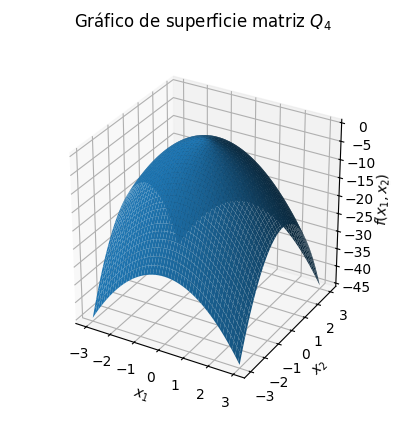

In [12]:
#Forma cuadrática Q4

# Matriz Q4
Q = np.array([[-2, 0],
              [0, -3]])

f = forma_cuadratica_q(X1,X2)


#Curvas de nivel
plt.figure()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
V = plt.contourf(X1,X2,f)
plt.title("Curvas de nivel matriz $Q_4$")
plt.colorbar(V)

plt.show()

#Grafico de superficie
fig,ax = plt.subplots(subplot_kw={"projection":"3d"},figsize=(10,5))
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x_1,x_2)$")
ax.plot_surface(X1,X2,f)
ax.set_title("Gráfico de superficie matriz $Q_4$")
ax.set_box_aspect([6,6,6],zoom=0.85)
plt.show()

**2.** Responda las siguientes preguntas:

- ¿Hay alguna similitud entre las gráficas de las matrices $Q_1$ y  $Q_2$? ¿A qué cree que se deba esta similitud?

- ¿Por qué la gráfica de la matriz $Q_3$ tiene esa forma tan peculiar (silla de montar)?
- ¿Qué similitudes y que diferencias encuentra entre las gráficas de las matrices $Q_1$ y $Q_4$? ¿A que cree que se deban esas diferencias?

In [15]:
# 1. Las graficas Q1 y Q2 son iguales ya que su ecuacion queda planteada de la misma manera, por lo cual tenemos la misma grafica

In [ ]:
# 2. tiene forma de silla de montar porque representa una forma cuadrática indefinida.

In [ ]:
''' 3. Q₁ y Q₄ tienen curvas de nivel elípticas centradas en el origen, pero Q₁ genera una parábola ascendente (mínimo) y Q₄ una descendente (máximo).
Q₁ no es simétrica y sus elipses están rotadas por los términos cruzados; en cambio, Q₄ es simétrica negativa definida y tiene elipses alineadas a los ejes.
En resumen: Q₁ sube, Q₄ baja; Q₁ tiene mezcla de direcciones, Q₄ es perfectamente alineada. '''